# BRFSS (Behavioral Risk Factor Surveillance System) EDA

In [56]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [2]:
brfss = pd.read_hdf('data/brfss.hdf5', 'brfss')

In [3]:
height = brfss['HTM4']
weight = brfss['WTKG3']

Text(0, 0.5, 'Weight in kg')

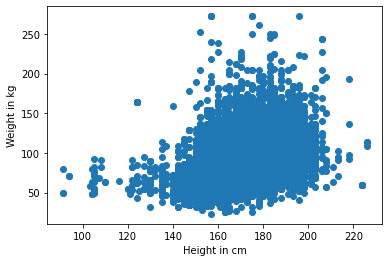

In [4]:
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

This is overplotted so we can try using transparency

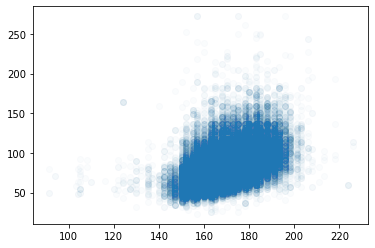

In [5]:
plt.plot(height, weight, 'o', alpha=0.02)

This is STILL overplotted so we can try to make the markers smaller

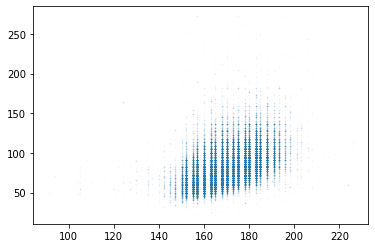

In [6]:
plt.plot(height, weight, 'o', alpha=0.02, markersize=1)

The data is in columns now (probably because it got measured in inches and converted to cm
We can address this by adding random noise to the data - called jittering

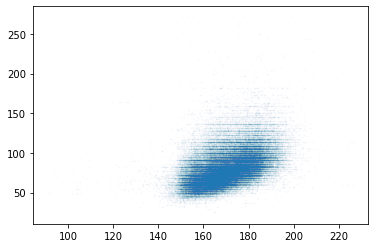

In [7]:
height_jitter = height + np.random.normal(0,2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)

Now we see that weight is also in rows so we add some jitter to the weight 

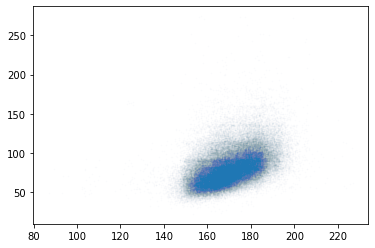

In [8]:
height_jitter = height + np.random.normal(0,2, size=len(brfss))
weight_jitter = weight + np.random.normal(0,2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)

Next we can zoom in on the data by passing parameters to the plotting axis

(140.0, 200.0, 0.0, 200.0)

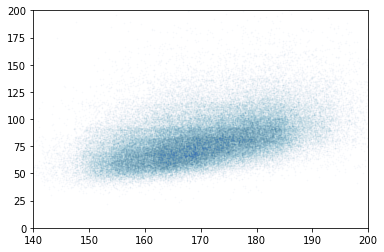

In [9]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 200])

In [10]:
weight_jitter.max()

274.46766741977285

In [11]:
# Eliminate rows where there are NaN values for 'AGE' AND 'WTKG3'
data = brfss.dropna(subset=['AGE','WTKG3'])

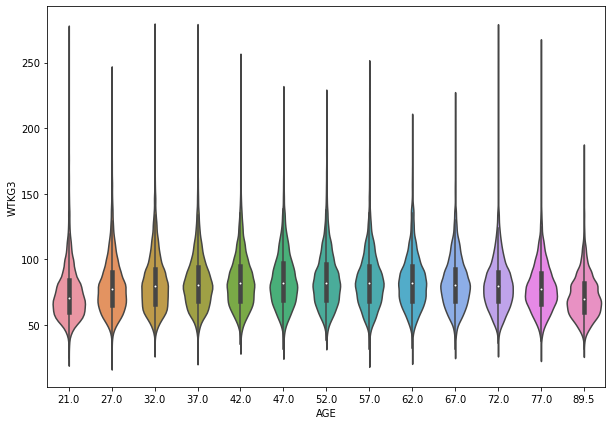

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.violinplot(x='AGE', y='WTKG3', data=data)

<AxesSubplot:xlabel='AGE', ylabel='WTKG3'>

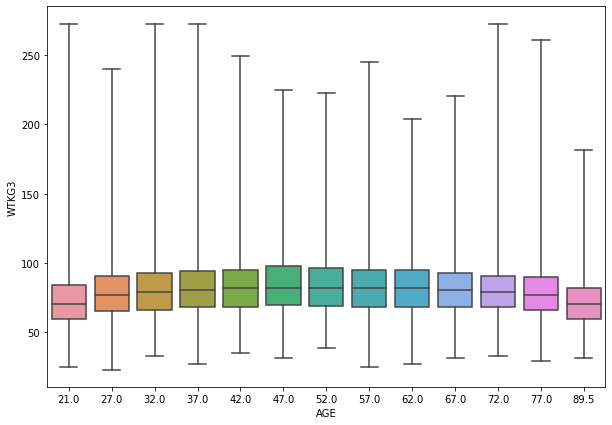

In [13]:
# Viewing the same results as a boxplot
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

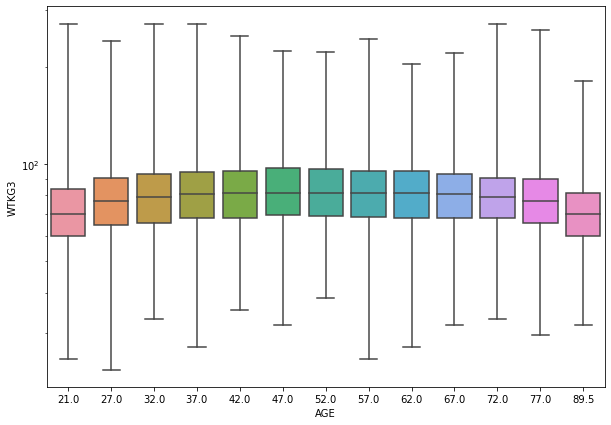

In [14]:
# This data obviously skews toward the higher values of weight so looking at it 
# on a log scale might be beneficial
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')

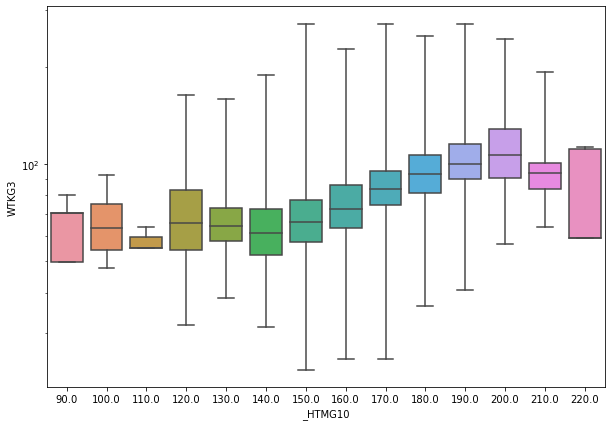

In [15]:
# Let's now look at the height in cm vs. weight using a similar log scale on the y axis
# Drop rows with missing data
fig, ax = plt.subplots(figsize=(10,7))
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)


# Plot the y-axis on a log scale
plt.yscale('log')

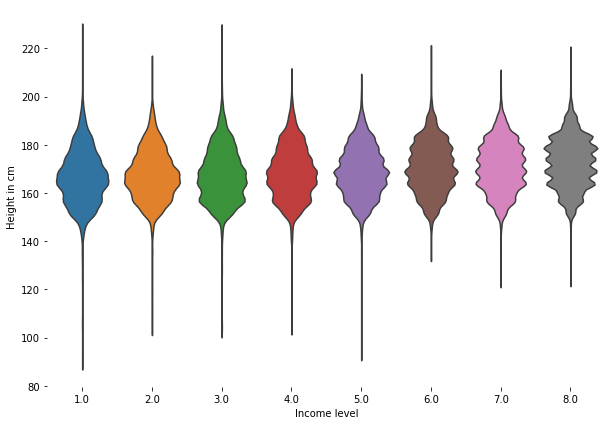

In [17]:
# Let's now use a violin plot to visualize the relationship between income and height.
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


# Correlation EDA

In [18]:
# Let's look at a subset of columns and do a Pearson's Correlation analysis
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

In [19]:
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


In [21]:
# The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.
# Let's see how this variable relates to age and income.

# Select columns
columns = ['AGE','INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


# Simple Regression

In [26]:
# Let's examine the height vs. weight relationship with a regression approach to see the slope of the line
subset = brfss.dropna(subset=['WTKG3','HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
res

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998)

(140.0, 200.0, 0.0, 200.0)

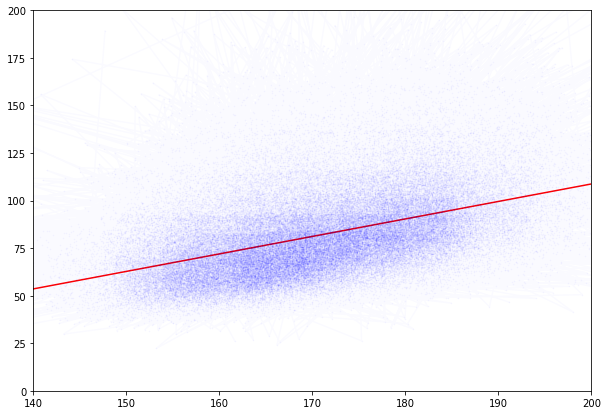

In [36]:
# Visualizing the prior information we can compute the line of best fit and plot it
# Find min and max of x
fx = np.array([xs.min(), xs.max()])
# Use y = mx + b for y values
fy = res.slope * fx + res.intercept
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(fx, fy, color='r', marker='+')
# Plot the scatter data for this we generated before
plt.plot(height_jitter, weight_jitter, marker='o', markersize=1, alpha=0.02, color='b')
plt.axis([140, 200, 0, 200])

This has a linear relationship so doing a regression makes sense. The R-value is reasonable but not strong at 0.47

### Non-Linear relationships

<AxesSubplot:xlabel='AGE', ylabel='WTKG3'>

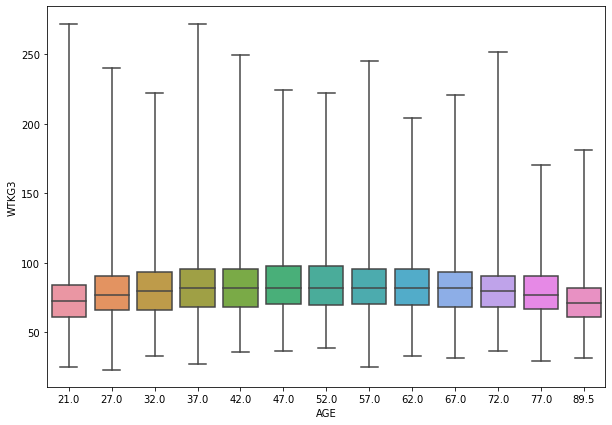

In [37]:
# Using the prior plot for the relationship between Weight and Age we see that it is a NON LINEAR relationship
# Viewing the same results as a boxplot
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

If we don't look at this plot and blindly compute the regression line here is what we get:

In [39]:
subset = brfss.dropna(subset=['WTKG3','AGE'])
xs = subset['AGE']
ys = subset['WTKG3']

res = linregress(xs, ys)
res

LinregressResult(slope=0.023981159566968724, intercept=80.07977583683224, rvalue=0.021641432889064068, pvalue=4.374327493007566e-11, stderr=0.003638139410742186)

Text(0, 0.5, 'Weight in kg')

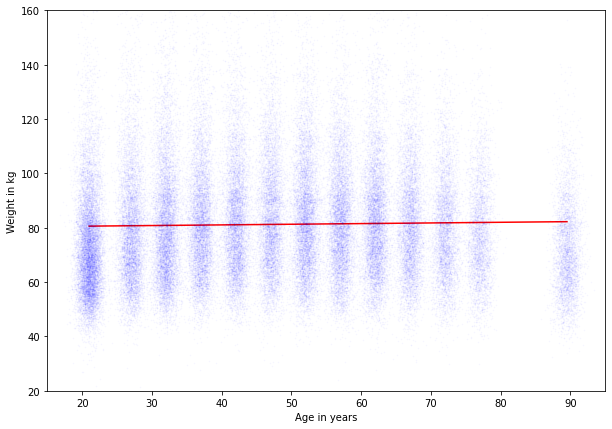

In [55]:
# Here is what the line of best fit looks like using this regression
# Visualizing the prior information we can compute the line of best fit and plot it
# Find min and max of x
fx = np.array([xs.min(), xs.max()])
# Use y = mx + b for y values
fy = res.slope * fx + res.intercept

age = brfss['AGE'] + np.random.normal(0,1, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0,2, size=len(brfss))
# Plotting this out
fig, ax = plt.subplots(figsize=(10,7))
ax = plt.plot(fx, fy, '-', color='r')
plt.plot(age, weight, 'o', markersize=1, alpha=0.02, color='b')
plt.axis([15,95,20,160])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Since we know from the plot that younger and older people weigh less this is a non-linear relationship
Not plotting it out and only using the regression would lead us to believe there is no relationship
because a straight line doesn't capture this relationship

# Multiple regression

We need to use statsmodels.formula.api as smf with 'ols' or 'ordinay least squares' (another name for regression) to do multiple regression because scipy.stats cannot

In [61]:
# Let's use the GSS dataset to examine the relationship between income and education
# Read the data into a pandas dataframe
gss = pd.read_hdf('data/gss.hdf5', 'gss')

In [62]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

Text(0, 0.5, 'Income (1986 $)')

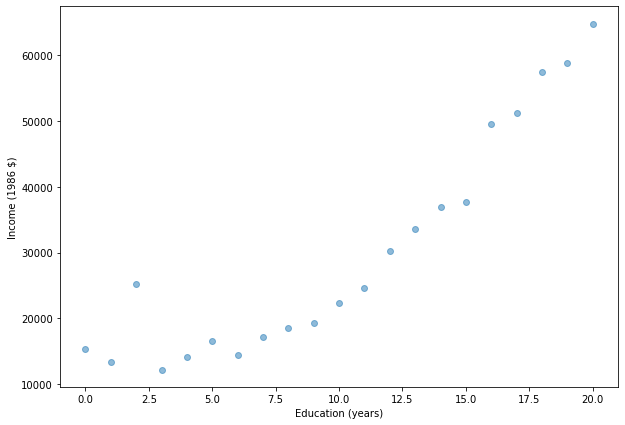

In [63]:
# Plot mean income as a scatter plot
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')

The relationship between Income and Education looks to be non-linear

In [65]:
# Let's try to fit a non-linear model
# Add a new column with educ squared and age squared
gss['educ2'] = gss['educ'] ** 2
gss['age2'] = gss['age'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


These results are confusing at best.
So we can turn to generating predictions from the model instead

In [67]:
# the predict() method of the results object created by smf.ols takes a dataframe as input and creates a prediction for each row
# So we need to generate a dataframe that has reasonable inputs

# Create a blank dataframe
df = pd.DataFrame()
# Create a column age and populate it with values between 18 and 85 using np.linspace()
df['age'] = np.linspace(18, 85)
# Make a new column with the square of the 'age' column
df['age2'] = df['age'] ** 2

# Do the same with 'educ'
df['educ'] = 12
df['educ2'] = df['educ'] ** 2

In [68]:
# Create a prediction 
pred12 = results.predict(df)

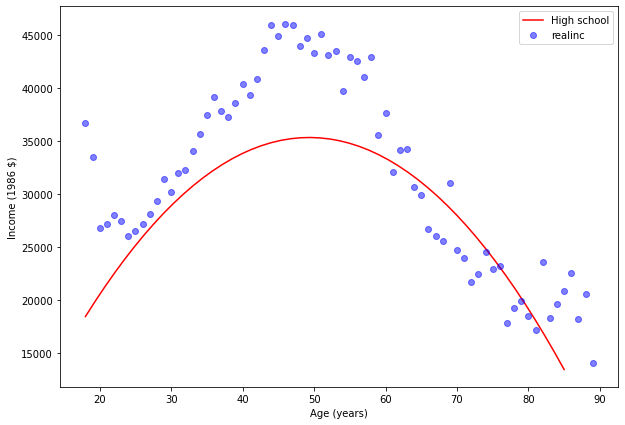

In [76]:
# Plot the results to see if the model fits with the observed data
fig, ax = plt.subplots(figsize=(10,7))
# Plot the predictions
plt.plot(df['age'], pred12, color='r', label='High school')
# Plot the observed data of the dataframe that we generated before from a groupby object
# Group by age
grouped = gss.groupby('age')

# Compute mean income in each group
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', color='b', alpha=0.5, label='realinc')

#Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

Doing this with other levels of education for Associate and Bachelors degrees

In [77]:
df['educ'] = 14
df['educ2'] = df['educ'] ** 2
pred14 = results.predict(df)

df['educ'] = 16
df['educ2'] = df['educ'] ** 2
pred16 = results.predict(df)

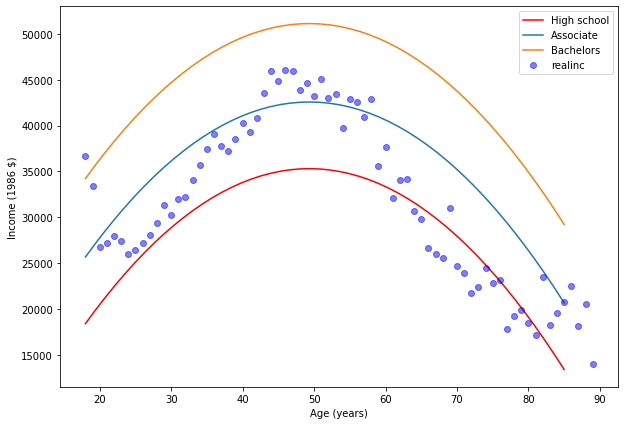

In [78]:
# Plot the results to see if the model fits with the observed data
fig, ax = plt.subplots(figsize=(10,7))
# Plot the predictions
plt.plot(df['age'], pred12, color='r', label='High school')
plt.plot(df['age'], pred14, label='Associate')
plt.plot(df['age'], pred16, label='Bachelors')
# Plot the observed data of the dataframe that we generated before from a groupby object
# Group by age
grouped = gss.groupby('age')

# Compute mean income in each group
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', color='b', alpha=0.5, label='realinc')

#Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

# Logistic regression

When the data has categorical variables we need to use logistic regression

In [80]:
# Examining 'gunlaw' from gss we need to first recode the variable to be expressed as '1' and '0' to make it a boolean
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [81]:
# Recoding
gss['gunlaw'].replace([2], [0], inplace=True)
# Check the results
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [82]:
# Now we can run the regression using logit instead of ols
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'

results = smf.logit(formula, data=gss).fit()

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


In [83]:
results.params

Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

The positive value of C(sex)[T.2] indicates that women are 'more likely' associated with True or
stated another way Women are more likely to have responded 'yes' to the gunlaw question
This can be visualized using the predictions method we did before and plotting it

In [84]:
df = pd.DataFrame()
df['age'] = np.linspace(18,89)
df['educ'] = 12
df['age2'] = df['age'] ** 2
df['educ2'] = df['educ'] ** 2

In [85]:
# Generate predictions for Men
df['sex'] = 1
pred1 = results.predict(df)

In [86]:
# Generate predictions for Women
df['sex'] = 2
pred2 = results.predict(df)

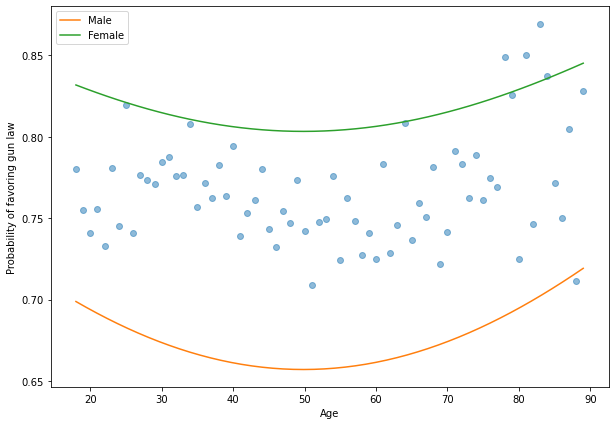

In [89]:
# Create age group and calculate the mean in each group 
# Keep in mind the mean of a binary variable is the fraction in favor
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()

# Plot the data
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(favor_by_age, 'o', alpha=0.5)

#Plot the predictions
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

# Label the axes
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


<Figure size 432x288 with 0 Axes>

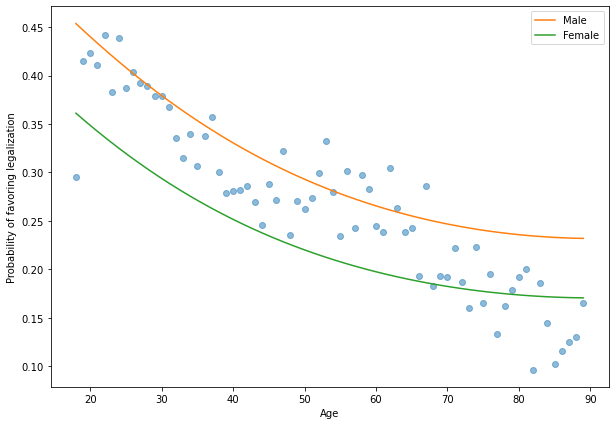

In [91]:
# Let's do it for the 'grass' survey question which asks "Should marijuana be legal?"
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

In [104]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,educ2,age2
0,1972,26.0,1946.0,1,1,18.0,13537.0,0.0,NaN,0.8893,324.0,676.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,144.0,1444.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,144.0,3249.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,196.0,3721.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,0.0,NaN,0.8893,144.0,3481.0


In [107]:
ct = pd.crosstab(gss['age'], gss['educ'], values=gss.query('sex == 1')['realinc'],aggfunc='mean').round(0)

In [108]:
ct.head()

educ,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
age,,,,,,,,,,,,,,,,,,,,,
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12831.0,33213.0,...,38349.0,36334.0,20001.0,62570.0,36146.0,NaN,NaN,NaN,NaN,NaN
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5338.0,19095.0,10302.0,...,42514.0,36333.0,43322.0,71254.0,NaN,NaN,NaN,NaN,NaN,137238.0
20.0,NaN,NaN,NaN,NaN,NaN,NaN,7363.0,NaN,17335.0,24812.0,...,21036.0,25921.0,30795.0,34117.0,30720.0,99988.0,NaN,20635.0,NaN,NaN
21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8308.0,2272.0,14313.0,...,20064.0,35225.0,24050.0,34444.0,33146.0,NaN,NaN,NaN,NaN,NaN
22.0,NaN,NaN,NaN,NaN,NaN,NaN,7962.0,5116.0,12468.0,39957.0,...,34129.0,31183.0,36241.0,40659.0,37440.0,32602.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='educ', ylabel='age'>

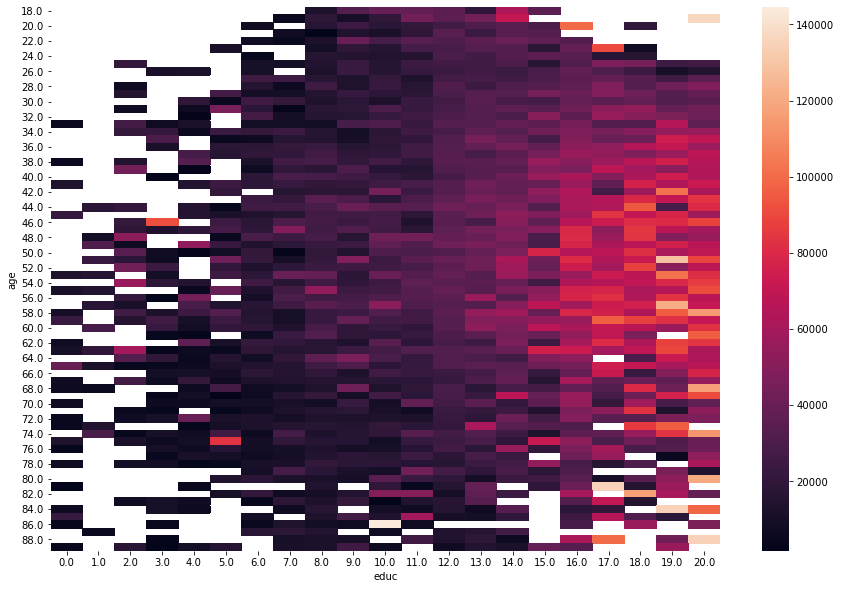

In [112]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ct)

<AxesSubplot:xlabel='educ', ylabel='age'>

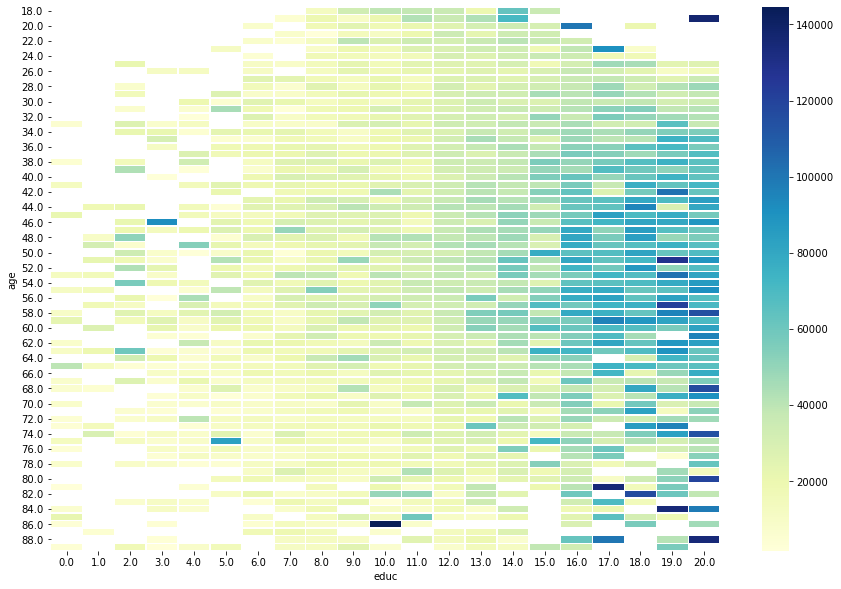

In [114]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ct, annot=False, fmt="g",
            cmap="YlGnBu", cbar=True, linewidths=.5, ax=ax)

In [188]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,educ2,age2
0,1972,26.0,1946.0,1,1,18.0,13537.0,0.0,NaN,0.8893,324.0,676.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,144.0,1444.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,144.0,3249.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,196.0,3721.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,0.0,NaN,0.8893,144.0,3481.0


In [212]:
sliced = pd.DataFrame(gss[['age','educ']])
sliced['bogus'] = sliced.apply(np.sum, axis=1)

In [213]:
sliced.head()

,age,educ,bogus
0,26.0,18.0,44.0
1,38.0,12.0,50.0
2,57.0,12.0,69.0
3,61.0,14.0,75.0
4,59.0,12.0,71.0


<AxesSubplot:xlabel='gunlaw', ylabel='count'>

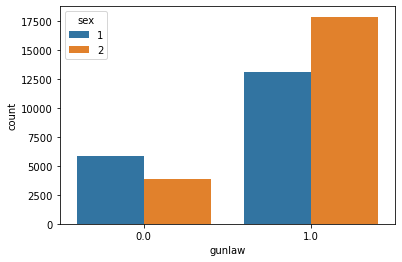

In [231]:
sns.countplot(x='gunlaw', hue='sex', data=gss)

In [232]:
gss.columns.isna().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

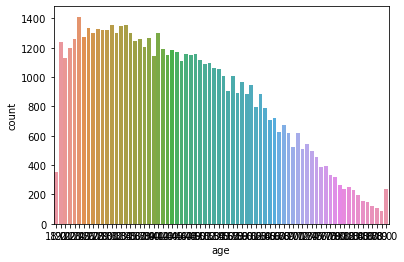

In [233]:
g = gss.age
sns.countplot(g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

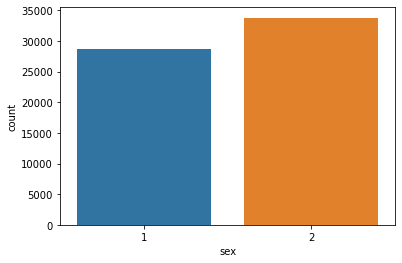

In [234]:
g = gss.sex
sns.countplot(g)

<AxesSubplot:xlabel='sex', ylabel='count'>

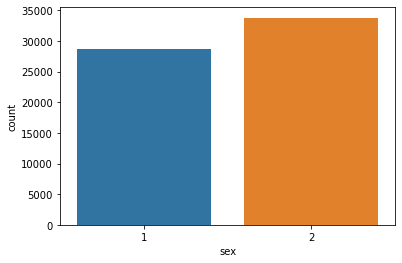

In [238]:
sns.countplot(x='sex', data=gss)

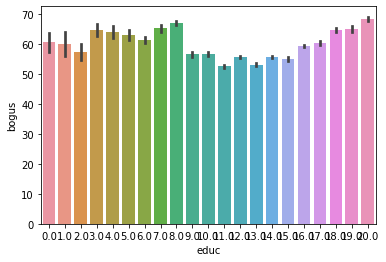

In [242]:
ax = sns.barplot(x='educ', y='bogus', data=sliced)

In [245]:
gss.dtypes

year         int64
age        float64
cohort     float64
sex          int64
race         int64
educ       float64
realinc    float64
gunlaw     float64
grass      float64
wtssall    float64
educ2      float64
age2       float64
dtype: object

In [246]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,educ2,age2
0,1972,26.0,1946.0,1,1,18.0,13537.0,0.0,NaN,0.8893,324.0,676.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,144.0,1444.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,144.0,3249.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,196.0,3721.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,0.0,NaN,0.8893,144.0,3481.0


In [248]:
gss_sort = gss.sort_index(ascending=False)

In [249]:
gss_sort.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,educ2,age2
62465,2016,56.0,1960.0,2,1,12.0,38610.0,1.0,NaN,0.478497,144.0,3136.0
62464,2016,57.0,1959.0,2,1,12.0,9945.0,0.0,NaN,0.956994,144.0,3249.0
62463,2016,67.0,1949.0,2,1,13.0,NaN,NaN,0.0,1.564363,169.0,4489.0
62462,2016,61.0,1955.0,2,1,16.0,65520.0,NaN,1.0,0.956994,256.0,3721.0
62461,2016,32.0,1984.0,1,1,13.0,74880.0,1.0,NaN,0.956994,169.0,1024.0
